# Semantic Deviation

### Import

In [18]:
import os
import pickle
import networkx as nx
import community as community_louvain
import numpy as np
from collections import Counter, defaultdict
from google.colab import drive

import json
import random
import pandas as pd
import csv

from sklearn.feature_extraction.text import *
from sklearn.metrics.pairwise import cosine_distances

# graph files folder
drive.mount('/content/drive')
graph_files = '/content/drive/My Drive/covid_project/graph_files'
community_detection = '/content/drive/My Drive/covid_project/community_detection'
word2vec = '/content/drive/My Drive/covid_project/word2vec'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### TF-IDF Deviation

#### Community 0

In [27]:
print("COMMUNITY 0\n")

community0 = []
with open(word2vec+'/community0/tweets_community0_rows_deleted.csv', 'r', encoding='utf-8') as inp:
  for row in csv.reader(inp):
    community0.append(row[0])

inp.close()

print(len(community0))
vectorizer0 = TfidfVectorizer(encoding='utf-8')

community0_vec_tfidf = vectorizer0.fit_transform(community0)
#print(vectorizer0.get_feature_names())

#Extract a dictionary < word : score >

words0_dict = {}

feature_names = vectorizer0.get_feature_names()

for doc in range(len(community0)):
  feature_index = community0_vec_tfidf[doc,:].nonzero()[1]
  tfidf_scores = zip(feature_index, [community0_vec_tfidf[doc, x] for x in feature_index])

  for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
    words0_dict[w] = s
#print(words0_dict)

std0 = np.std(list(words0_dict.values()))
mean0 = np.mean(list(words0_dict.values()))
print(f"MEAN = {mean0}")
print(f"STANDARD DEVIATION = {std0}")

COMMUNITY 0

7181
MEAN = 0.37013623172828297
STANDARD DEVIATION = 0.14574362566415464


#### Community 1

In [28]:
print("COMMUNITY 1\n")

community1 = []
with open(word2vec+'/community1/tweets_community1_rows_deleted.csv', 'r', encoding='utf-8') as inp:
  for row in csv.reader(inp):
    community1.append(row[0])

inp.close()

print(len(community1))

vectorizer1 = TfidfVectorizer(encoding='utf-8')

community1_vec_tfidf = vectorizer1.fit_transform(community1)
#print(vectorizer1.get_feature_names())

#Extract a dictionary < word : score >

words1_dict = {}

feature_names = vectorizer1.get_feature_names()

for doc in range(len(community1)):
  feature_index = community1_vec_tfidf[doc,:].nonzero()[1]
  tfidf_scores = zip(feature_index, [community1_vec_tfidf[doc, x] for x in feature_index])

  for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
    words1_dict[w] = s
#print(words1_dict)

std1 = np.std(list(words1_dict.values()))
mean1 = np.mean(list(words1_dict.values()))
print(f"MEAN = {mean1}")
print(f"STANDARD DEVIATION = {std1}")

COMMUNITY 1

3130
MEAN = 0.3653716706522932
STANDARD DEVIATION = 0.14475856614398702


#### Community 2

In [29]:
print("COMMUNITY 2\n")

community2 = []
with open(word2vec+'/community2/tweets_community2_rows_deleted.csv', 'r', encoding='utf-8') as inp:
  for row in csv.reader(inp):
    community2.append(row[0])

inp.close()

print(len(community2))

vectorizer2 = TfidfVectorizer(encoding='utf-8')

community2_vec_tfidf = vectorizer2.fit_transform(community2)
#print(vectorizer2.get_feature_names())

#Extract a dictionary < word : score >

words_dict = {}

feature_names = vectorizer2.get_feature_names()

for doc in range(len(community2)):
  feature_index = community2_vec_tfidf[doc,:].nonzero()[1]
  tfidf_scores = zip(feature_index, [community2_vec_tfidf[doc, x] for x in feature_index])

  for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
    words_dict[w] = s
#print(words_dict)

std2 = np.std(list(words_dict.values()))
mean2 = np.mean(list(words_dict.values()))
print(f"MEAN = {mean2}")
print(f"STANDARD DEVIATION = {std2}")

COMMUNITY 2

6672
MEAN = 0.3672117289041492
STANDARD DEVIATION = 0.14580657056402857


### Word2Vec Deviation

In [6]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 
  
warnings.filterwarnings(action = 'ignore') 
  
import gensim 
from gensim.models import Word2Vec 
from gensim.models.keyedvectors import KeyedVectors

from scipy.spatial import distance

from sklearn.manifold import TSNE
import re
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Community 0

300


<function matplotlib.pyplot.show>

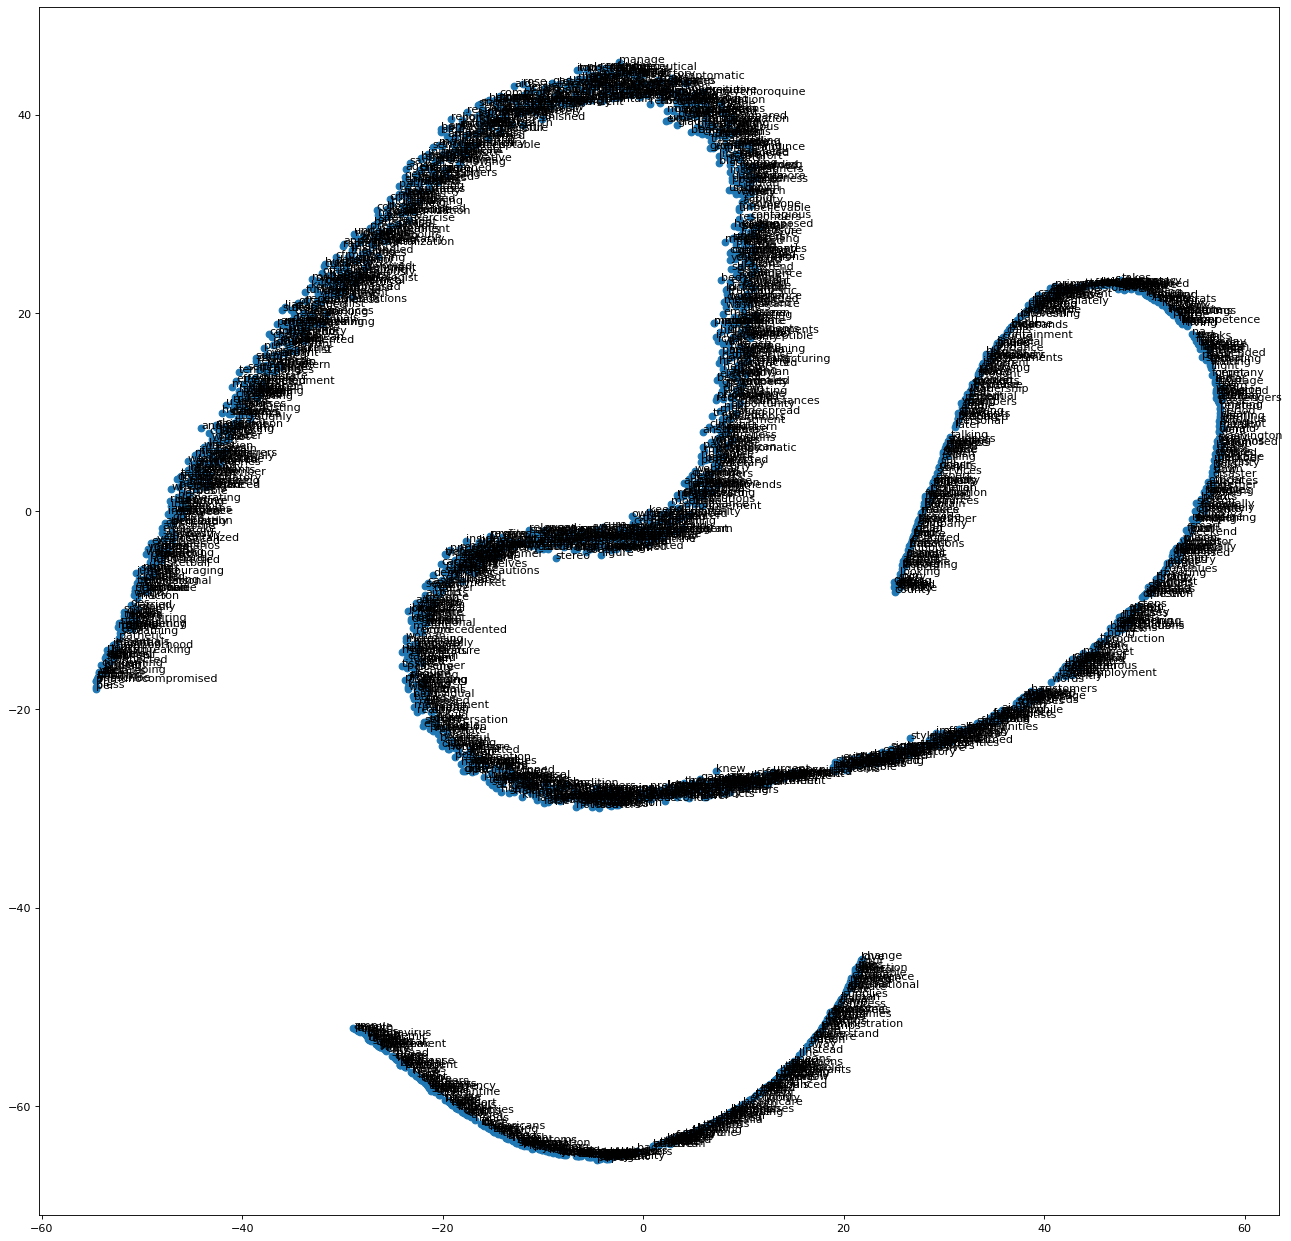

In [7]:
sentences0 = []
for c in community0:
  s = [nltk.word_tokenize(sent) for sent in nltk.sent_tokenize(c)]
  sentences0.append(s[0])

model0 = gensim.models.Word2Vec(sentences0, size=300)

#print(list(model0.wv.vocab))
print(len(model0['food']))

# Plot graph words
vocab = list(model0.wv.vocab)
X = model0[vocab]

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])

fig = plt.figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos)

plt.show

#### Community 1

300


<function matplotlib.pyplot.show>

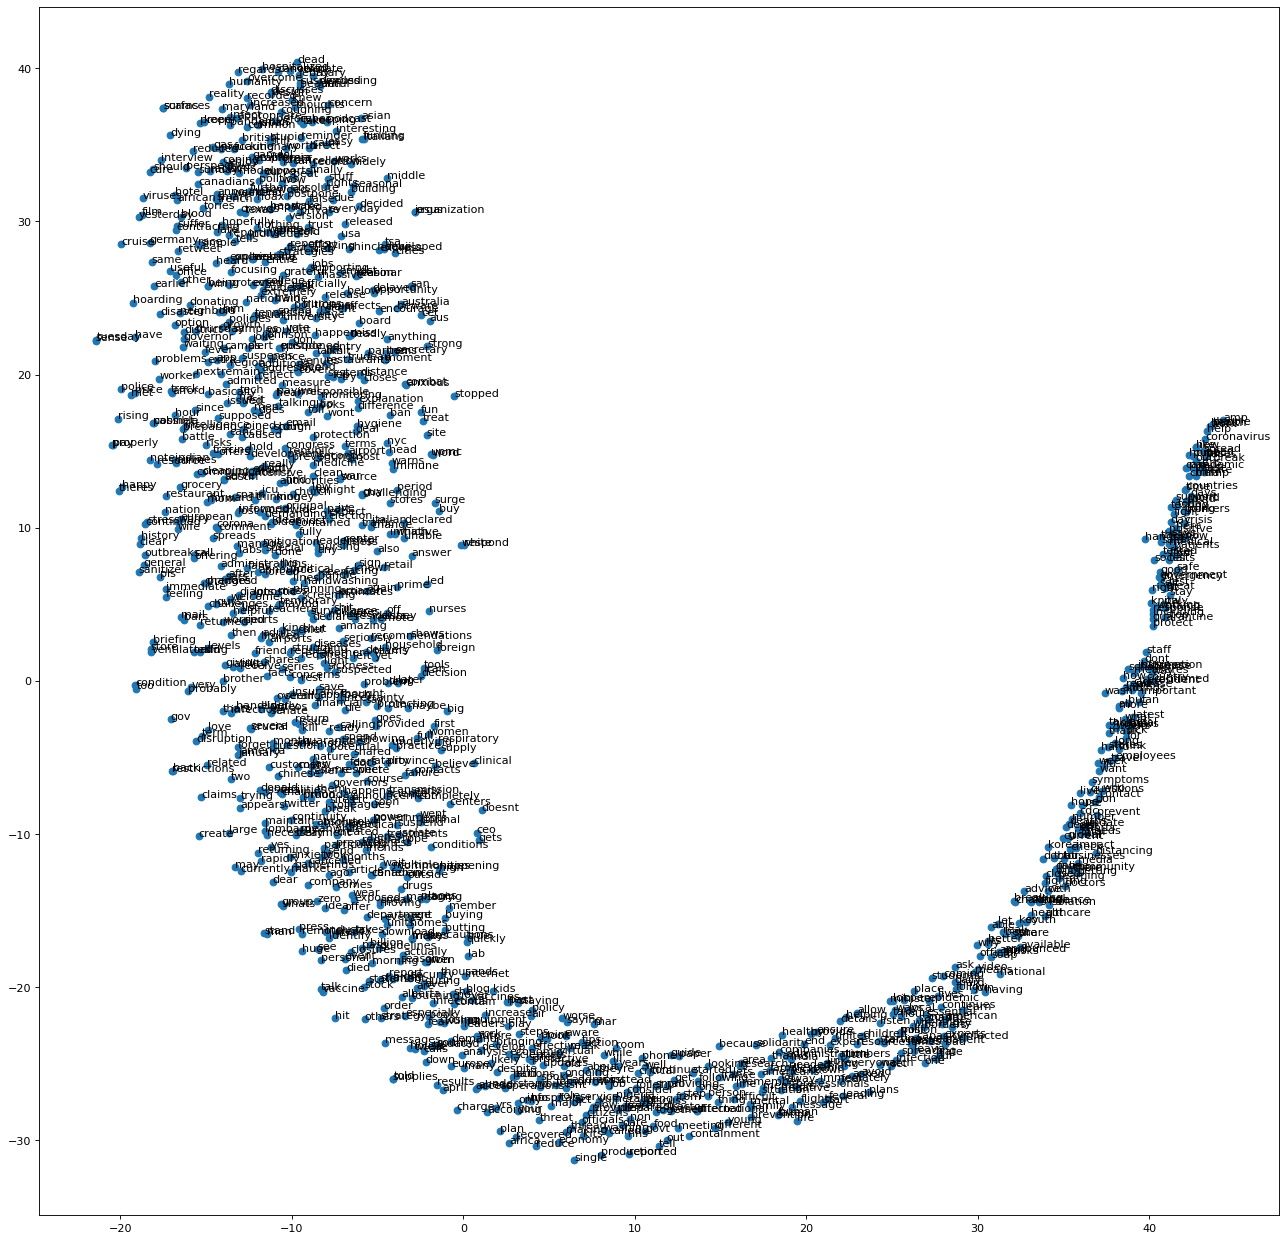

In [8]:
sentences1 = []
for c in community1:
  s = [nltk.word_tokenize(sent) for sent in nltk.sent_tokenize(c)]
  sentences1.append(s[0])

model1 = gensim.models.Word2Vec(sentences1, size=300)

#print(list(model1.wv.vocab))
print(len(model1['food']))

# Plot graph words
vocab = list(model1.wv.vocab)
X = model1[vocab]

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])

fig = plt.figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos)

plt.show

#### Community 2

300


<function matplotlib.pyplot.show>

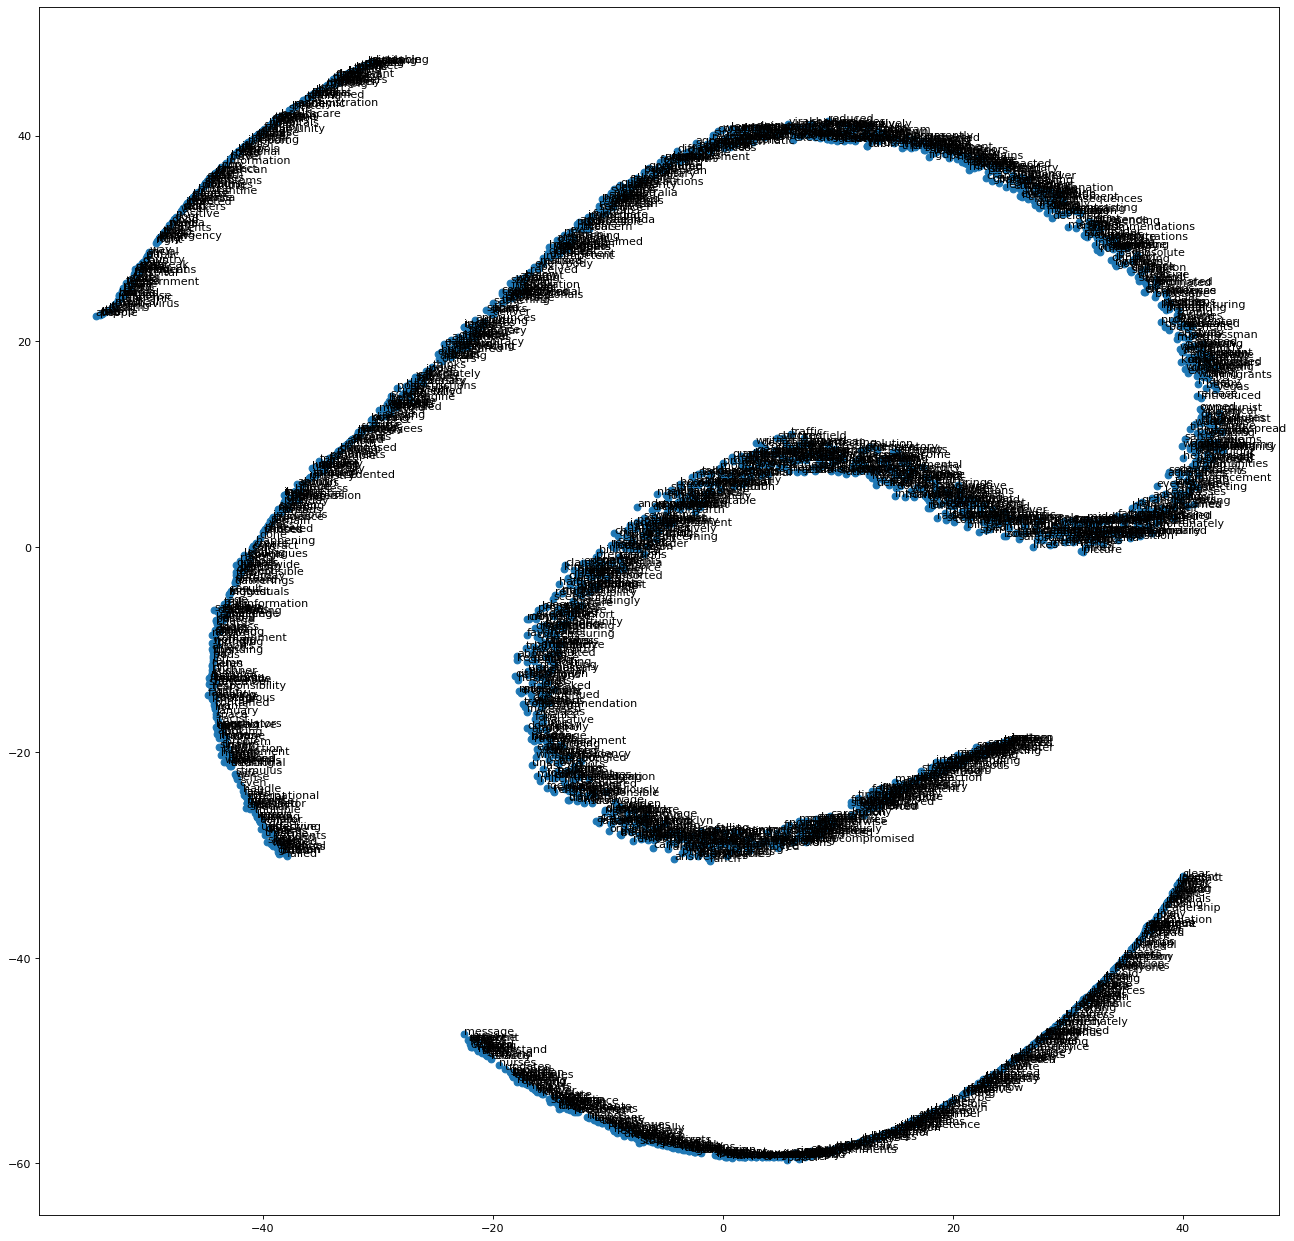

In [9]:
sentences2 = []
for c in community2:
  s = [nltk.word_tokenize(sent) for sent in nltk.sent_tokenize(c)]
  sentences2.append(s[0])

model2 = gensim.models.Word2Vec(sentences2, size=300)

#print(list(model2.wv.vocab))
print(len(model2['food']))

# Plot graph words
vocab = list(model2.wv.vocab)
X = model2[vocab]

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])

fig = plt.figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos)

plt.show

#### Global Dataset

In [10]:
global_dataset = '/content/drive/My Drive/covid_project/word2vec/global_dataset'

global_model = KeyedVectors.load_word2vec_format(global_dataset+'/Set1_TweetDataWithoutSpam_Word.bin', binary=True)

In [11]:
print(len(global_model['food']))

300


### Distance

#### Processing

In [12]:
words0 = list(model0.wv.vocab)
words1 = list(model1.wv.vocab)
words2 = list(model2.wv.vocab)

words_intersection = list(set(words0) & set(words1) & set(words2))

print(len(words_intersection))

1033


#### Compute Deviation

In [31]:
deviation = {}
global_model_words = list(global_model.wv.vocab)

for w in words_intersection:
  if w in global_model_words:
    dist0 = distance.cosine(global_model[w], model0[w])
    dist1 = distance.cosine(global_model[w], model1[w])
    dist2 = distance.cosine(global_model[w], model2[w])
    max_dev = max(dist0, dist1, dist2)
    if max_dev == dist0: d = 0
    if max_dev == dist1: d = 1
    if max_dev == dist2: d = 2
    deviation[w] = [max_dev, d]

print(len(deviation))
#print(deviation)

1029


In [32]:
dev_com = defaultdict(list)
for elem in deviation:
  dev_com[deviation[elem][1]].append(elem)

#print(dev_com)
print(len(dev_com[0]))
print(len(dev_com[1]))
print(len(dev_com[2]))

499
174
356


### Save Results

In [33]:
with open(word2vec+'/semantic_deviation/deviated_words_community0.txt', 'w') as f1:
  for elem in dev_com[0]:
    f1.write(elem+"\n")

with open(word2vec+'/semantic_deviation/deviated_words_community1.txt', 'w') as f2:
  for elem in dev_com[1]:
    f2.write(elem+"\n")

with open(word2vec+'/semantic_deviation/deviated_words_community2.txt', 'w') as f3:
  for elem in dev_com[2]:
    f3.write(elem+"\n")

In [34]:
import pickle
with open(word2vec+'/semantic_deviation/deviation_dictionary.pickle', "wb") as f:
    pickle.dump(deviation, f)